<a href="https://colab.research.google.com/github/tanmaych/Testing/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
consumerKey = 'vbXDyI6rnF6bd0Ci9HAb4pu2A'
consumerSecret = 'dH1BOcsR33QyH2aHXH3rkhYo3j6IOG68WmrXMemSjq1i01ztWl'
accessToken = '1245411331588493314-GxWdOo8fna7ZoY7vCYHpLP5XR1PVsK'
accessTokenSecret = '7lxdB0sYWx1NHHOFbbd4CctWpQVZTMszXZ7RnezroEclO'

In [13]:
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

In [14]:
api = tweepy.API(authenticate,wait_on_rate_limit = True)

In [16]:
posts = api.user_timeline(screen_name = "ArpitAg21352060",count=100, lang = "en" , tweet_mode="extended")
print("5 tweets \n")
i =1
for tweet in posts[0:6]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i + 1

5 tweets 

1)RT @dhruv_rathee: What Kunal Kamra did to Arnab, Arnab does it daily on his TV studio.

In fact, he goes 10 steps further to harass &amp; defam…

2)RT @dhruv_rathee: Ok Bhakts, 

Time to boycott Microsoft and Windows now. Just be careful that you don’t start boycotting windows of your h…

3)RT @swatic12: In 2 states when Ananya asks Krish about his ambitions in life, he says 'I want to write stories, honest stories. Story main…

4)RT @Mom_Overboard: I'm short. 69 for me is more like ₆9.

5)RT @swatic12: Thodi der so leti hun - me trying  to solve complex life issues

6)RT @kunalkamra88: While everyone is criticising @anjanaomkashyap here’s a video that shows she’s a dedicated, truthful &amp; nonpartisan journa…



In [17]:
df =  pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])
df.head()

,Tweets
0,RT @dhruv_rathee: What Kunal Kamra did to Arna...
1,"RT @dhruv_rathee: Ok Bhakts, \n\nTime to boyco..."
2,RT @swatic12: In 2 states when Ananya asks Kri...
3,RT @Mom_Overboard: I'm short. 69 for me is mor...
4,RT @swatic12: Thodi der so leti hun - me tryin...


In [18]:
def cleanTxt(text): 
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r':','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"_rathee What Kunal Kamra did to Arnab, Arnab d..."
1,"_rathee Ok Bhakts, \n\nTime to boycott Microso..."
2,In 2 states when Ananya asks Krish about his a...
3,_Overboard I'm short. 69 for me is more like ₆9.
4,Thodi der so leti hun - me trying to solve co...
5,While everyone is criticising here’s a video ...
6,Millennials are not buying a car because they'...
7,BoycottMillennials\nFarmer's are dying because...
8,Very true mam. Also rupee is falling because o...
9,Modiji gave students exam advice\nModiji gave ...


In [19]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"_rathee What Kunal Kamra did to Arnab, Arnab d...",0.250,0.000
1,"_rathee Ok Bhakts, \n\nTime to boycott Microso...",0.750,0.200
2,In 2 states when Ananya asks Krish about his a...,0.900,0.600
3,_Overboard I'm short. 69 for me is more like ₆9.,0.400,0.250
4,Thodi der so leti hun - me trying to solve co...,0.400,-0.300
5,While everyone is criticising here’s a video ...,0.500,0.500
6,Millennials are not buying a car because they'...,0.200,0.200
7,BoycottMillennials\nFarmer's are dying because...,0.000,0.000
8,Very true mam. Also rupee is falling because o...,0.845,0.455
9,Modiji gave students exam advice\nModiji gave ...,0.000,0.000


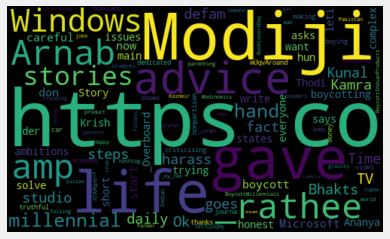

In [20]:
allWords = ' '.join([twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500,height = 300,random_state= 21, max_font_size =119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [21]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else :
    return 'Positive'
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"_rathee What Kunal Kamra did to Arnab, Arnab d...",0.250,0.000,Neutral
1,"_rathee Ok Bhakts, \n\nTime to boycott Microso...",0.750,0.200,Positive
2,In 2 states when Ananya asks Krish about his a...,0.900,0.600,Positive
3,_Overboard I'm short. 69 for me is more like ₆9.,0.400,0.250,Positive
4,Thodi der so leti hun - me trying to solve co...,0.400,-0.300,Negative
5,While everyone is criticising here’s a video ...,0.500,0.500,Positive
6,Millennials are not buying a car because they'...,0.200,0.200,Positive
7,BoycottMillennials\nFarmer's are dying because...,0.000,0.000,Neutral
8,Very true mam. Also rupee is falling because o...,0.845,0.455,Positive
9,Modiji gave students exam advice\nModiji gave ...,0.000,0.000,Neutral


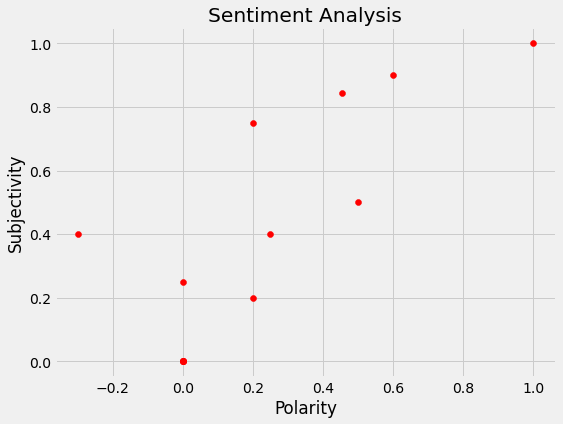

In [22]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Red' )
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [23]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets
round( (ptweets.shape[0]/df.shape[0])*100, 1)

43.8

In [24]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets
round( (ntweets.shape[0]/df.shape[0])*100, 1)

6.2

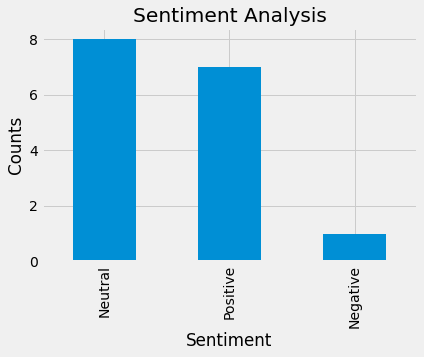

In [25]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()